In [1]:
import pandas as pd
import numpy as np
import copy
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [3]:
filepath = '/home/user/Desktop/env2/VAR/macro/macro_analysis_libor.xlsx'
df = pd.read_excel(filepath)
##########for the plot only
df1=df[["Date","Libor 1M","BGCR Repo rates"]]
df1.dropna(inplace=True)
df1.index=df1['Date']
df1=df1.drop(['Date'],axis=1)
##########upto this
####### For further analysis
df=df[["Date","Libor 1M","Interest Rates","Inflation","GDP per capita","GDP history","Fedfunds","Treasury Rates"]]
# df=df[["Date","Libor 1M","BGCR Repo rates"]]
# df.dropna(inplace=True)
df.index=df['Date']
df=df.drop(['Date'],axis=1)
df.tail()

/home/user/Desktop/env2/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Libor 1M,Interest Rates,Inflation,GDP per capita,GDP history,Fedfunds,Treasury Rates
Date,,,,,,,
01-12-2020,0.08050,0.25,1.36,46468,18719.206604,0.09,0.076364
01-01-2021,0.08463,0.25,1.40,51605,19042.710610,0.09,0.076316
01-02-2021,0.07925,0.25,1.68,47374,18867.884626,0.08,0.035789
01-03-2021,0.07950,0.25,2.62,47374,18867.884626,0.07,0.024348
01-04-2021,0.07475,0.25,3.48,47374,18867.884626,0.07,0.016667


Text(0.5, 1.0, 'PLOT OF LIBOR AGAINST GDP HISTORY')

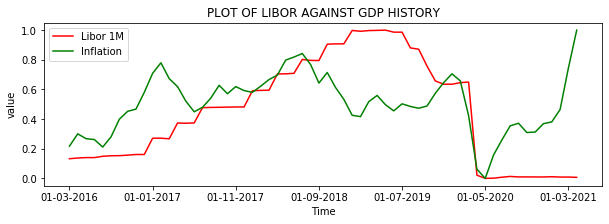

In [5]:
df_min_max_scaled = df.copy()
df1_min_max_scaled=df1.copy()
# apply normalization techniques by Column 1
columns=df_min_max_scaled.columns
columns1=df1_min_max_scaled.columns
for col in columns:
    df_min_max_scaled[col] = (df_min_max_scaled[col] - df_min_max_scaled[col].min()) / (df_min_max_scaled[col].max() - df_min_max_scaled[col].min())    
for col in columns1:
    df1_min_max_scaled[col] = (df1_min_max_scaled[col] - df1_min_max_scaled[col].min()) / (df1_min_max_scaled[col].max() - df1_min_max_scaled[col].min())    

plt.rcParams["figure.figsize"] = (10,3)
df_min_max_scaled["Libor 1M"].plot(color="red",legend=True)
df_min_max_scaled["Inflation"].plot(color="green",legend=True)
#df_min_max_scaled["Interest Rates"].plot(color="cyan",legend=True)
#plt.xticks([1-1-2016,1-1-2021])
plt.xlabel("Time")
plt.ylabel("value")
plt.title("PLOT OF LIBOR AGAINST GDP HISTORY")
    
    
    
    
# cols=list(df.columns)[1:]
# cols1=list(df1.columns[1:])
# view normalized data
#display(df1_min_max_scaled)
# plt.rcParams["figure.figsize"] = (20,10)
# fig, ax = plt.subplots(4,2)
# plt.suptitle("PLOT OF DIFFERENT MACRO VARIABLES WITH LIBOR MONTHLY AVERAGE DATA", fontsize=14)
# fig.delaxes(ax[3,1])
# c=0
# for i in range(4):
#     for j in range(2):
#         if c<=len(cols)-1:
#             ax[i,j].plot(df_min_max_scaled["Libor 1M"])
#             ax[i,j].plot(df_min_max_scaled[cols[c]])
#             ax[i,j].legend(["LIBOR 1M",cols[c]])
#             ax[i,j].set_xticks(["01-03-2016","01-03-2017","01-03-2018","01-03-2019","01-03-2020","01-03-2021"])
#             ax[i,j].set_xlabel("Time")
#             ax[i,j].set_ylabel("Value")
#             c=c+1
#         else:
#             ax[i,j].plot(df1_min_max_scaled["Libor 1M"])
#             ax[i,j].plot(df1_min_max_scaled[cols1])
#             ax[i,j].legend(["LIBOR 1M",cols1])
#             ax[i,j].set_xticks(["01-04-2018","01-03-2019","01-03-2020","01-03-2021"])
#             ax[i,j].set_xlabel("Time")
#             ax[i,j].set_ylabel("Value")

In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df["Inflation"], df["Libor 1M"])
print('Pearsons correlation: %.3f' % corr)

In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df["Interest Rates"], df["Libor 1M"])
print('Pearsons correlation: %.3f' % corr)

In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df["GDP per capita"], df["Libor 1M"])
print('Pearsons correlation: %.3f' % corr)

In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df["GDP history"], df["Libor 1M"])
print('Pearsons correlation: %.3f' % corr)

In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df["Fedfunds"], df["Libor 1M"])
print('Pearsons correlation: %.3f' % corr)

In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df["Treasury Rates"], df["Libor 1M"])
print('Pearsons correlation: %.3f' % corr)

In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df["BGCR Repo rates"], df["Libor 1M"])
print('Pearsons correlation: %.3f' % corr)

In [6]:
#df["Inflation_lag1"]=df["Inflation"].shift(-1)
#df["Inflation_lag2"]=df["Inflation"].shift(-2)
df["Inflation_lag3"]=df["Inflation"].shift(-3)
df.dropna(inplace=True)
df.tail()

,Libor 1M,Interest Rates,Inflation,GDP per capita,GDP history,Fedfunds,Treasury Rates,Inflation_lag3
Date,,,,,,,,
01-09-2020,0.08125,0.25,1.37,47544,18831.846527,0.09,0.089524,1.36
01-10-2020,0.08175,0.25,1.16,47096,18956.190721,0.09,0.086667,1.40
01-11-2020,0.08113,0.25,1.17,46397,18715.264006,0.09,0.086842,1.68
01-12-2020,0.08050,0.25,1.36,46468,18719.206604,0.09,0.076364,2.62
01-01-2021,0.08463,0.25,1.40,51605,19042.710610,0.09,0.076316,3.48


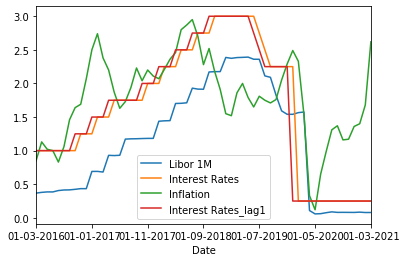

In [85]:
df["Interest Rates_lag1"]=df["Interest Rates"].shift(-1)
#df["Interest Rates_lag2"]=df["Interest Rates"].shift(-2)
#df["Interest Rates_lag3"]=df["Interest Rates"].shift(-3)
df.dropna(inplace=True)
df.tail()

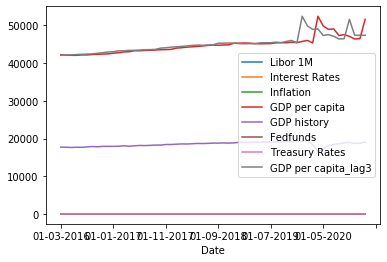

In [161]:
#df["GDP per capita_lag1"]=df["GDP per capita"].shift(-1)
#df["GDP per capita_lag2"]=df["GDP per capita"].shift(-2)
df["GDP per capita_lag3"]=df["GDP per capita"].shift(-3)
df.dropna(inplace=True)
df.tail()

In [192]:
#df["GDP history_lag1"]=df["GDP history"].shift(-1)
df["GDP history_lag2"]=df["GDP history"].shift(-2)
#df["GDP history_lag3"]=df["GDP history"].shift(-3)
df.dropna(inplace=True)
df.tail()

,Libor 1M,Interest Rates,Inflation,GDP per capita,GDP history,Fedfunds,Treasury Rates,GDP history_lag2
Date,,,,,,,,
01-10-2020,0.08175,0.25,1.16,47096,18956.190721,0.09,0.086667,18719.206604
01-11-2020,0.08113,0.25,1.17,46397,18715.264006,0.09,0.086842,19042.710610
01-12-2020,0.08050,0.25,1.36,46468,18719.206604,0.09,0.076364,18867.884626
01-01-2021,0.08463,0.25,1.40,51605,19042.710610,0.09,0.076316,18867.884626
01-02-2021,0.07925,0.25,1.68,47374,18867.884626,0.08,0.035789,18867.884626


In [223]:
#df["Fedfunds_lag1"]=df["Fedfunds"].shift(-1)
#df["Fedfunds_lag2"]=df["Fedfunds"].shift(-2)
df["Fedfunds_lag3"]=df["Fedfunds"].shift(-3)
df.dropna(inplace=True)
df.head()

,Libor 1M,Interest Rates,Inflation,GDP per capita,GDP history,Fedfunds,Treasury Rates,Fedfunds_lag3
Date,,,,,,,,
01-03-2016,0.3679,1.0,0.85,42189,17716.406119,0.36,0.253182,0.38
01-04-2016,0.3791,1.0,1.13,42107,17696.890725,0.37,0.187619,0.39
01-05-2016,0.3858,1.0,1.02,42064,17616.657836,0.37,0.226190,0.40
01-06-2016,0.3855,1.0,1.00,42058,17691.227102,0.38,0.221364,0.40
01-07-2016,0.4061,1.0,0.83,42163,17648.556072,0.39,0.263500,0.40


In [240]:
#df["Treasury Rates_lag1"]=df["Treasury Rates"].shift(-1)
#df["Treasury Rates_lag2"]=df["Treasury Rates"].shift(-2)
df["Treasury Rates_lag3"]=df["Treasury Rates"].shift(-3)
df.dropna(inplace=True)
df.head()

,Libor 1M,Interest Rates,Inflation,GDP per capita,GDP history,Fedfunds,Treasury Rates,Treasury Rates_lag3
Date,,,,,,,,
01-03-2016,0.3679,1.0,0.85,42189,17716.406119,0.36,0.253182,0.221364
01-04-2016,0.3791,1.0,1.13,42107,17696.890725,0.37,0.187619,0.263500
01-05-2016,0.3858,1.0,1.02,42064,17616.657836,0.37,0.226190,0.260870
01-06-2016,0.3855,1.0,1.00,42058,17691.227102,0.38,0.221364,0.191429
01-07-2016,0.4061,1.0,0.83,42163,17648.556072,0.39,0.263500,0.244000


In [257]:
#df["BGCR Repo rates_lag1"]=df["BGCR Repo rates"].shift(-1)
df["BGCR Repo rates_lag2"]=df["BGCR Repo rates"].shift(-2)
#df["BGCR Repo rates_lag3"]=df["BGCR Repo rates"].shift(-3)
df.dropna(inplace=True)
df.tail()

,Libor 1M,BGCR Repo rates,BGCR Repo rates_lag2
Date,,,
01-10-2020,0.08175,0.060952,0.065000
01-11-2020,0.08113,0.065263,0.050526
01-12-2020,0.08050,0.065000,0.028947
01-01-2021,0.08463,0.050526,0.011304
01-02-2021,0.07925,0.028947,0.010000


In [8]:
# df=df[["Libor 1M","Inflation"]]
df=df[["Libor 1M","Inflation_lag3"]]
df.tail()

,Libor 1M,Inflation_lag3
Date,,
01-09-2020,0.08125,1.36
01-10-2020,0.08175,1.40
01-11-2020,0.08113,1.68
01-12-2020,0.08050,2.62
01-01-2021,0.08463,3.48


In [9]:
#GRANGER'S CAUSALITY TEST TO DETERMINE THE PRESENCE OF RELATIONSHIPS BETWEEN TIME SERIES.
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=10
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            print(p_values)
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns) 

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.0771, 0.5148, 0.2659, 0.0339, 0.0324, 0.0116, 0.01, 0.0069, 0.0059, 0.0109]
[0.0146, 0.0, 0.0001, 0.0, 0.0, 0.0, 0.0, 0.0001, 0.0002, 0.0011]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


,Libor 1M_x,Inflation_lag3_x
Libor 1M_y,1.0000,0.0
Inflation_lag3_y,0.0059,1.0


In [10]:
#TRAIN-TEST SPLIT

nobs = int(0.1*len(df))
print(nobs)
df_train, df_test = df.iloc[:-nobs,:], df.iloc[-nobs:,:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

5
(54, 2)
(5, 2)


In [11]:
#AUGMENTED DICKEY-FULLER TEST FOR STATIONARITY

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")
          
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Libor 1M" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.7897
 No. Lags Chosen       = 8
 Critical value 1%     = -3.585
 Critical value 5%     = -2.928
 Critical value 10%    = -2.602
 => P-Value = 0.0598. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Inflation_lag3" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.5218
 No. Lags Chosen       = 2
 Critical value 1%     = -3.566
 Critical value 5%     = -2.92
 Critical value 10%    = -2.598
 => P-Value = 0.1103. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




In [12]:
# 1st difference
df_differenced = df_train.diff().dropna()
df_diff=pd.DataFrame()
columns=df_train.columns
for col in columns:
    
    df_diff[str(col)+"difference1"]=df_train[str(col)].diff()
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Libor 1M" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 1.2265
 No. Lags Chosen       = 5
 Critical value 1%     = -3.578
 Critical value 5%     = -2.925
 Critical value 10%    = -2.601
 => P-Value = 0.9962. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Inflation_lag3" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.2325
 No. Lags Chosen       = 1
 Critical value 1%     = -3.566
 Critical value 5%     = -2.92
 Critical value 10%    = -2.598
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.




In [13]:
# 2nd difference
df_differenced = df_differenced.diff().dropna()
for col in columns:
    
    df_diff[str(col)+"difference2"]=df_diff[str(col)+"difference1"].diff()
# df_diff["difference2"]=df_diff["difference1"].diff()
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Libor 1M" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.9681
 No. Lags Chosen       = 4
 Critical value 1%     = -3.578
 Critical value 5%     = -2.925
 Critical value 10%    = -2.601
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Inflation_lag3" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.7056
 No. Lags Chosen       = 3
 Critical value 1%     = -3.575
 Critical value 5%     = -2.924
 Critical value 10%    = -2.6
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.




In [214]:
# 3rd difference
df_differenced = df_differenced.diff().dropna()
for col in columns:
    
    df_diff[str(col)+"difference3"]=df_diff[str(col)+"difference2"].diff()
#df_diff["difference3"]=df_diff["difference2"].diff()
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Libor 1M" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.8553
 No. Lags Chosen       = 8
 Critical value 1%     = -3.593
 Critical value 5%     = -2.932
 Critical value 10%    = -2.604
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Fedfunds_lag1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.4659
 No. Lags Chosen       = 7
 Critical value 1%     = -3.589
 Critical value 5%     = -2.93
 Critical value 10%    = -2.603
 => P-Value = 0.0002. Rejecting Null Hypothesis.
 => Series is Stationary.




In [14]:
#FIT THE VAR MODEL

model = VAR(df_differenced)


/home/user/Desktop/env2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [15]:
#TRAINING THE MODEL

model_fitted = model.fit(3)  #place the lag value as parameter
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 10, May, 2021
Time:                     16:39:25
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -4.53965
Nobs:                     49.0000    HQIC:                  -4.87510
Log likelihood:         -0.591815    FPE:                 0.00624338
AIC:                     -5.08017    Det(Omega_mle):      0.00478008
--------------------------------------------------------------------
Results for equation Libor 1M
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                    -0.006416         0.031214           -0.206           0.837
L1.Libor 1M              -0.872103         0.142501           -6.120           0.000
L1.Inflation_lag3        -0.278821       

In [16]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
print(df_differenced)
forecast_input = df_differenced.values[-lag_order:]
forecast_input

3
            Libor 1M  Inflation_lag3
Date                                
01-05-2016  -0.00450            0.40
01-06-2016  -0.00700            0.17
01-07-2016   0.02090           -0.22
01-08-2016  -0.01230           -0.13
01-09-2016  -0.00659            0.33
01-10-2016   0.00651            0.05
01-11-2016   0.00201           -0.19
01-12-2016  -0.01057           -0.60
01-01-2017   0.25656            0.18
01-02-2017  -0.25555           -0.15
01-03-2017  -0.01011            0.09
01-04-2017   0.25777            0.34
01-05-2017  -0.25166            0.11
01-06-2017   0.00777            0.08
01-07-2017   0.23612           -0.48
01-08-2017  -0.23667            0.35
01-09-2017  -0.00223           -0.25
01-10-2017   0.00112            0.05
01-11-2017  -0.00056            0.18
01-12-2017  -0.00194            0.01
01-01-2018   0.25472           -0.05
01-02-2018  -0.24875            0.24
01-03-2018  -0.00375           -0.27
01-04-2018   0.25313            0.01
01-05-2018  -0.25313           -0.33

array([[ 0.05399, -0.26   ],
       [ 0.01101, -0.27   ],
       [-0.00226,  0.22   ]])

In [17]:
# Forecast
od=2 #order of difference to make it stationary
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_'+str(od)+'d')
df_forecast

,Libor 1M_2d,Inflation_lag3_2d
Date,,
01-09-2020,-0.023874,0.153883
01-10-2020,-0.148878,0.011153
01-11-2020,0.109784,-0.089725
01-12-2020,0.033054,-0.060440
01-01-2021,-0.010691,-0.013418


In [18]:
#INVERT TRANSFORMATION TO GET REAL FORECAST
def invert(ori,diff_data):
    last_val=ori[-1]
    data=[]
    for idx,i in enumerate(diff_data):
        #print(idx,i+last_val)
        last_val+=i
        data.append(last_val)
    #print(len(data))
    return data

def invert_transformation(df_train, df_forecast,df_diff, difference):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:   
        if difference==3:
            df_fc[str(col)+"_2d"]=invert(list(df_diff[str(col)+"difference2"].values),list(df_fc[str(col)+"_3d"].values))
            df_fc[str(col)+"_1d"]=invert(list(df_diff[str(col)+"difference1"].values),list(df_fc[str(col)+"_2d"].values))
            df_fc[str(col)+" forecast"]=invert(list(df_train[str(col)].values),list(df_fc[str(col)+"_1d"].values)) 
        # Roll back 2nd Diff
        if difference==2:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
            # Roll back 1st Diff
            df_fc[str(col)+' forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
        elif difference==1:
            df_fc[str(col)+' forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
        elif difference==0:
            df_fc[str(col)+' forecast']=df_fc[str(col)+'_0d']
    return df_fc



df_results_all = invert_transformation(df_train, df_forecast,df_diff, od)
df_results=copy.deepcopy(df_results_all)
columns=df_results_all.columns
for col in columns:
    if len(col.split())==1:
        df_results.drop(col,axis=1,inplace=True)
print(df_results)
# df_results.loc[:, ['rgnp_forecast', 'pgnp_forecast', 'ulc_forecast', 'gdfco_forecast',
#                    'gdf_forecast', 'gdfim_forecast', 'gdfcf_forecast', 'gdfce_forecast']]

            Libor 1M_2d  Libor 1M_1d  Libor 1M forecast  \
Date                                                      
01-09-2020    -0.023874    -0.011504           0.077496   
01-10-2020    -0.148878    -0.160382          -0.082886   
01-11-2020     0.109784    -0.050597          -0.133483   
01-12-2020     0.033054    -0.017544          -0.151027   
01-01-2021    -0.010691    -0.028235          -0.179261   

            Inflation_lag3 forecast  
Date                                 
01-09-2020                 1.333883  
01-10-2020                 1.508918  
01-11-2020                 1.594229  
01-12-2020                 1.619098  
01-01-2021                 1.630550  


In [139]:
# df_forecast["GDP history_lag1_3d"]
# df_train["GDP history_lag1"].tail()

Date
01-05-2020    18160.357443
01-06-2020    18390.400828
01-07-2020    18571.343079
01-08-2020    18831.846527
01-09-2020    18956.190721
Name: GDP history_lag1, dtype: float64

In [141]:
# def invert(ori,diff_data):
#     last_val=ori[-1]
#     data=[]
#     for idx,i in enumerate(diff_data):
#         print(idx,i+last_val)
#         last_val+=i
#         data.append(last_val)
#     print(len(data))
#     return data
# df_results=pd.DataFrame()
# df_fc=df_forecast.copy()
# columns = df_train.columns
# for col in columns:

#     df_results[str(col)+"_2d"]=invert(list(df_diff[str(col)+"difference2"].values),list(df_fc[str(col)+"_3d"].values))
#     df_results[str(col)+"_1d"]=invert(list(df_diff[str(col)+"difference1"].values),list(df_results[str(col)+"_2d"].values))
#     df_results[str(col)+" forecast"]=invert(list(df_train[str(col)].values),list(df_results[str(col)+"_1d"].values))
# df_results

0 -0.09895631039697564
1 -0.027248760020810253
2 -0.06405266910130891
3 -0.054307195641623895
4 -0.051480010970626315
5 -0.05666208182960841
6
0 -0.10670631039697563
1 -0.13395507041778587
2 -0.19800773951909478
3 -0.2523149351607187
4 -0.303794946131345
5 -0.3604570279609534
6
0 -0.02545631039697563
1 -0.1594113808147615
2 -0.35741912033385626
3 -0.6097340554945749
4 -0.9135290016259199
5 -1.2739860295868732
6
0 -30.61248919828715
1 -56.85233863272725
2 -67.68218239504209
3 -52.324001145775405
4 -63.57095537409267
5 -60.219415540366974
6
0 93.73170461831258
1 36.87936598558532
2 -30.802816409456767
3 -83.12681755523218
4 -146.69777292932486
5 -206.91718846969184
6
0 19049.922425652512
1 19086.801791638096
2 19055.99897522864
3 18972.872157673406
4 18826.17438474408
5 18619.25719627439
6


,Libor 1M_2d,Libor 1M_1d,Libor 1M forecast,GDP history_lag1_2d,GDP history_lag1_1d,GDP history_lag1 forecast
0,-0.098956,-0.106706,-0.025456,-30.612489,93.731705,19049.922426
1,-0.027249,-0.133955,-0.159411,-56.852339,36.879366,19086.801792
2,-0.064053,-0.198008,-0.357419,-67.682182,-30.802816,19055.998975
3,-0.054307,-0.252315,-0.609734,-52.324001,-83.126818,18972.872158
4,-0.051480,-0.303795,-0.913529,-63.570955,-146.697773,18826.174385
5,-0.056662,-0.360457,-1.273986,-60.219416,-206.917188,18619.257196


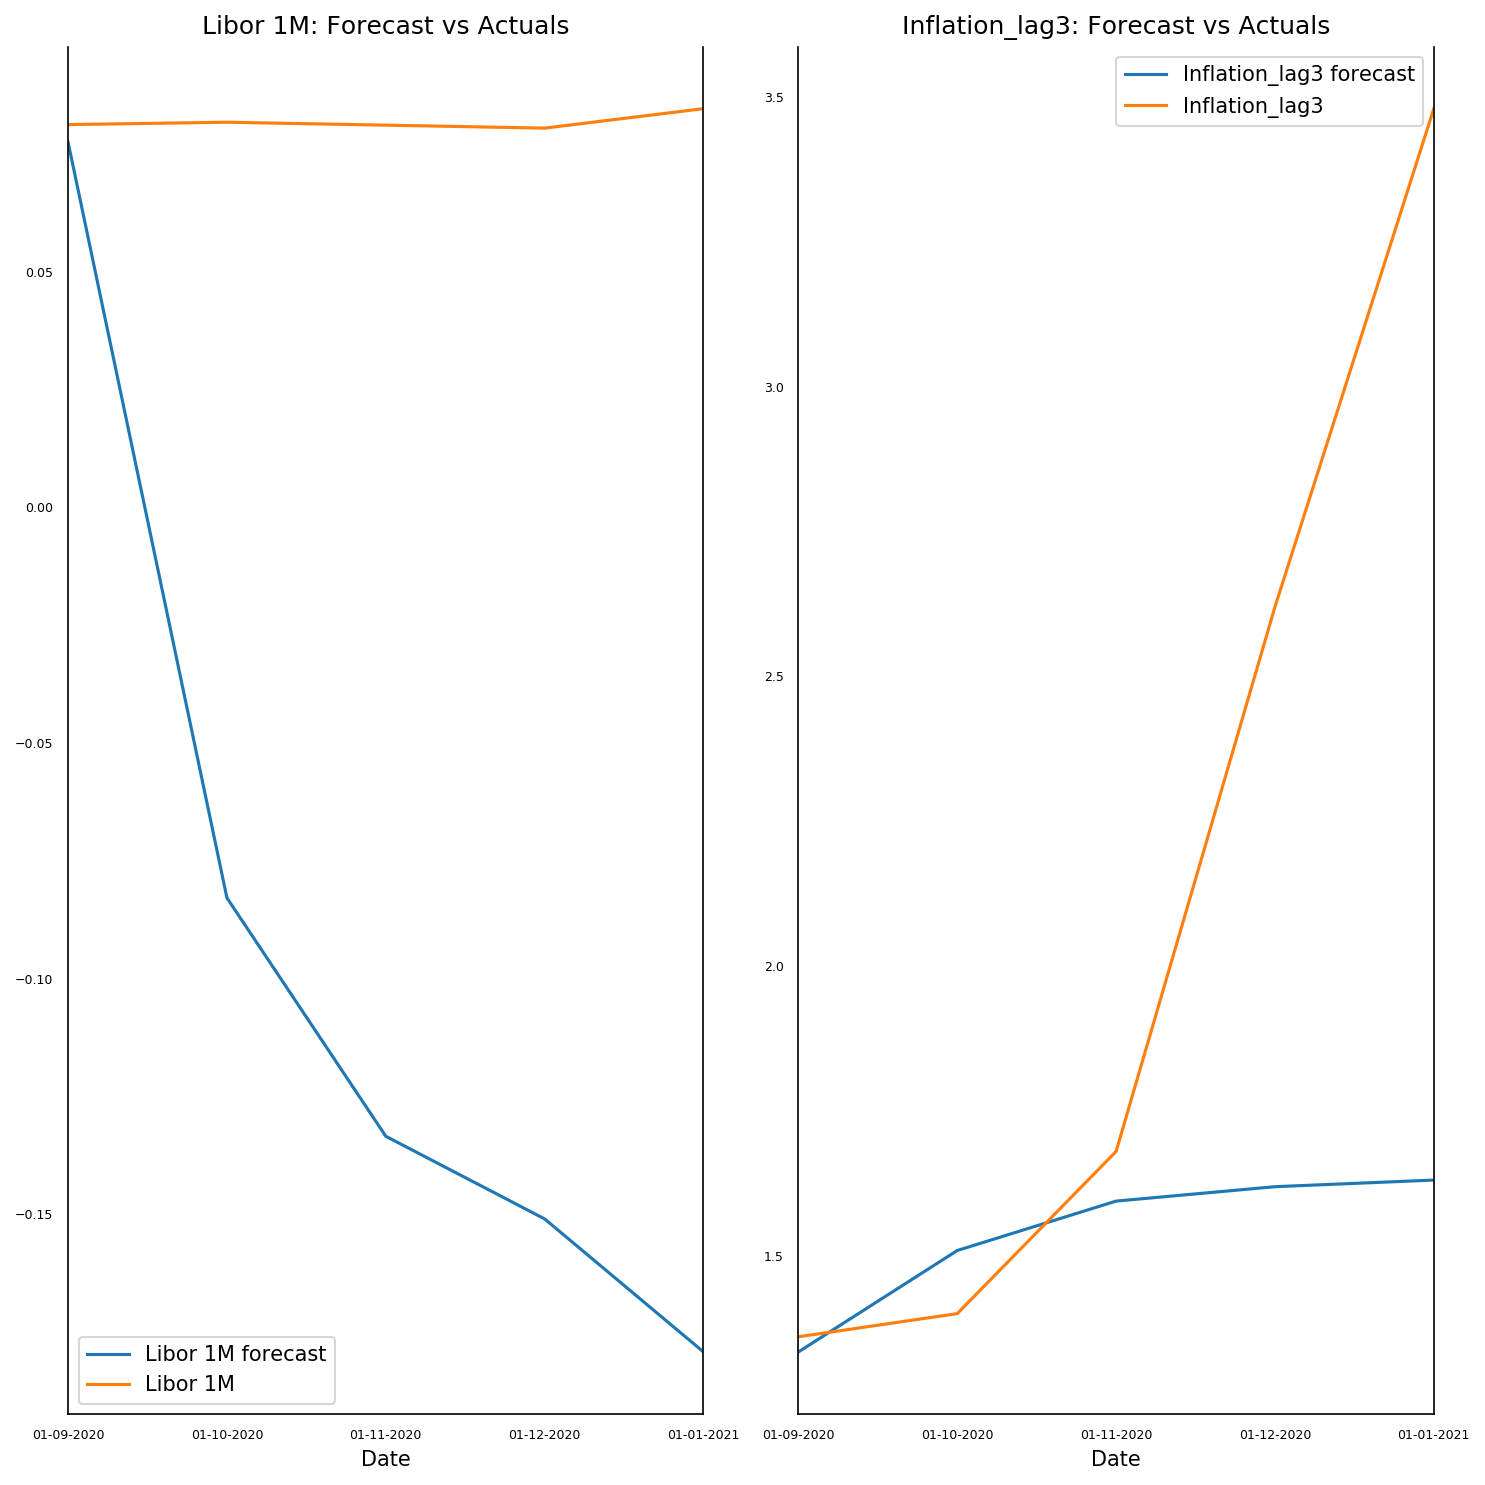

In [19]:
#PLOT OF ACTUAL VS FORECAST

fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+' forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [20]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'rmse':rmse})
columns=df_train.columns
for col in columns:
    print('Forecast Accuracy of: '+str(col))
    accuracy_prod = forecast_accuracy(df_results[str(col)+' forecast'].values, df_test[str(col)])
    for k, v in accuracy_prod.items():
        print(k, ': ', round(v,4))


Forecast Accuracy of: Libor 1M
rmse :  0.1982
Forecast Accuracy of: Inflation_lag3
rmse :  0.9426
